In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

from tabulate import tabulate
from klib import data_cleaning


In [99]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data PreProcessing - missing values

In [83]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

# Data Visualisation

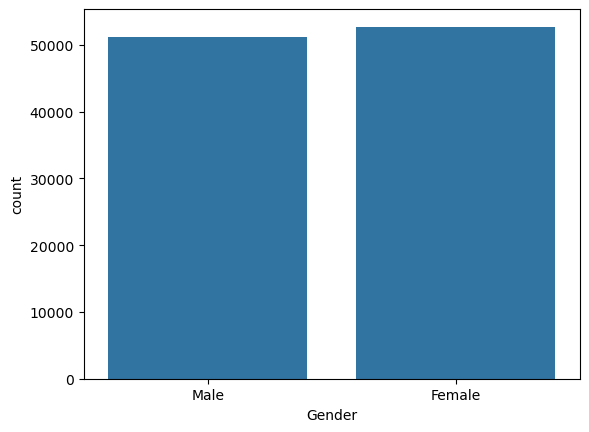

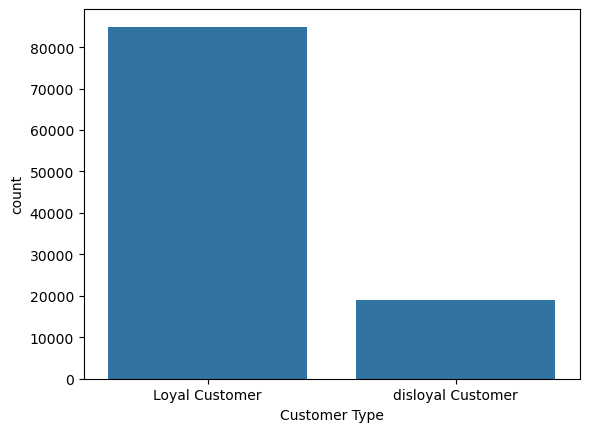

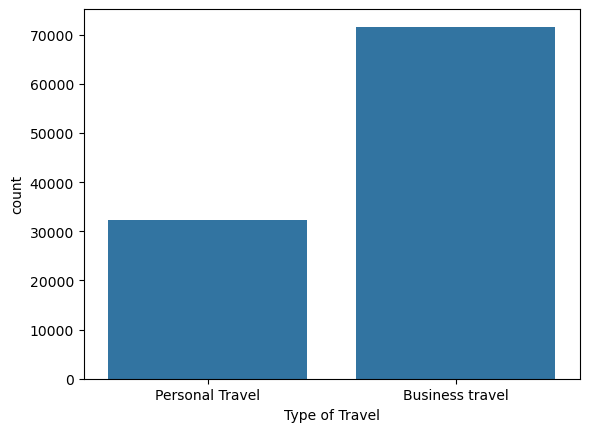

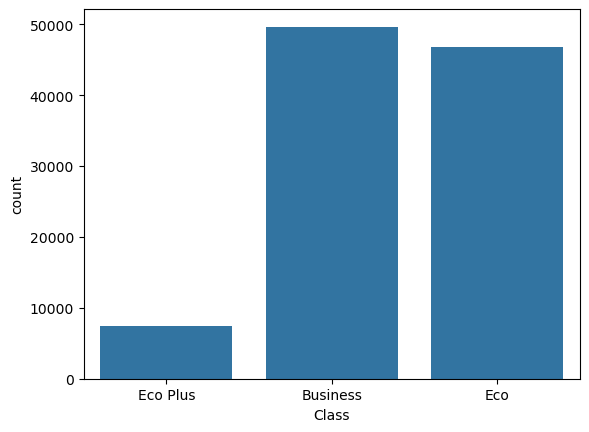

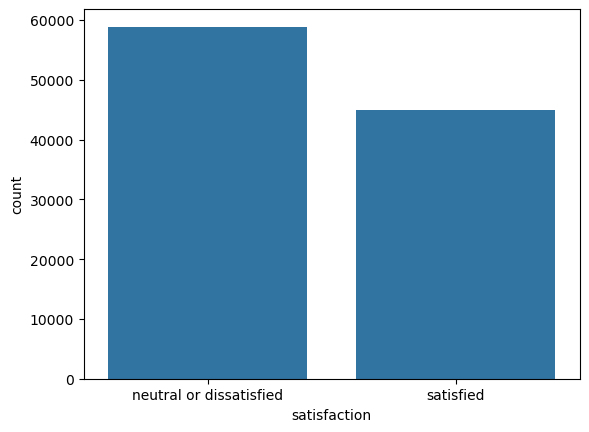

In [100]:
for col in df.columns:
    if df[col].dtype == 'object':
        sns.countplot(x=col, data=df)
        plt.show()


([<matplotlib.patches.Wedge at 0x16c16e6c0>,
 [Text(-0.22870506272227167, 1.0759618925804026, 'neutral or dissatisfied'),
  Text(0.228705062722272, -1.0759618925804026, 'satisfied')],
 [Text(-0.12474821603032998, 0.5868883050438559, '56.7%'),
  Text(0.12474821603033018, -0.5868883050438559, '43.3%')])

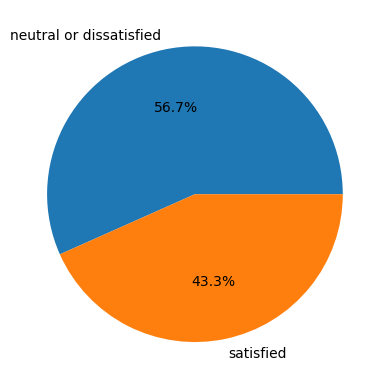

In [101]:
plt.pie(df['satisfaction'].value_counts(), labels=['neutral or dissatisfied', 'satisfied'], autopct='%1.1f%%')

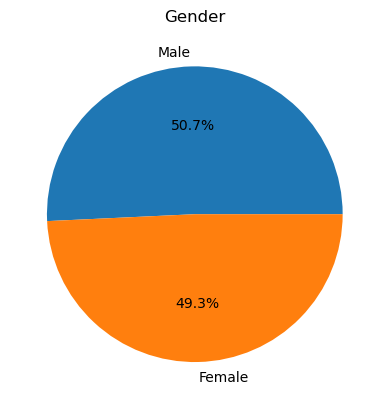

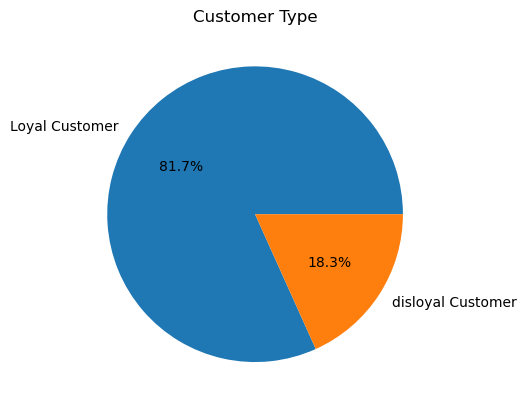

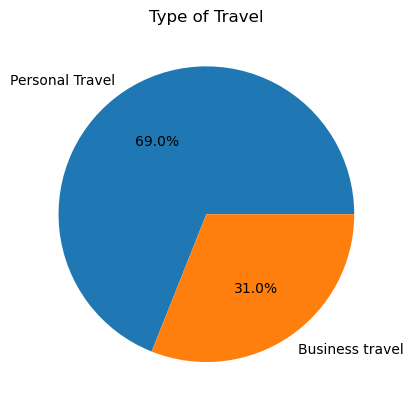

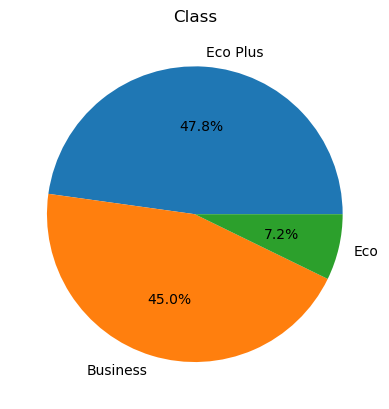

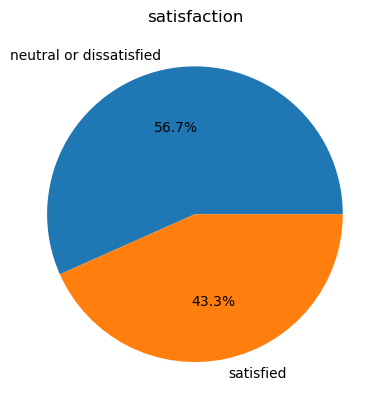

In [109]:
for col in df.columns:
    if df[col].dtype == 'object':
        plt.title(col)
        plt.pie(df[col].value_counts(), labels=df[col].unique(), autopct='%1.1f%%')
        plt.show()

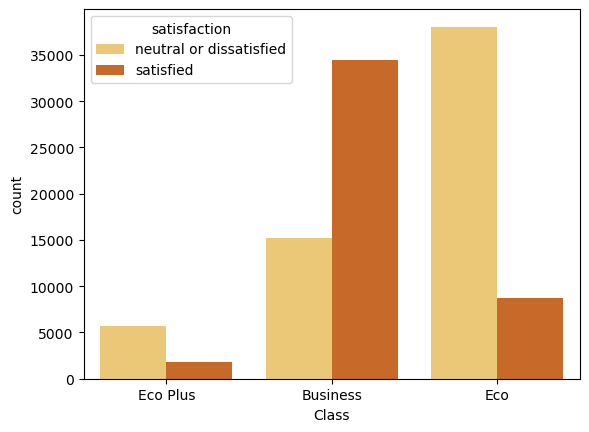

In [110]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = df)
plt.show()

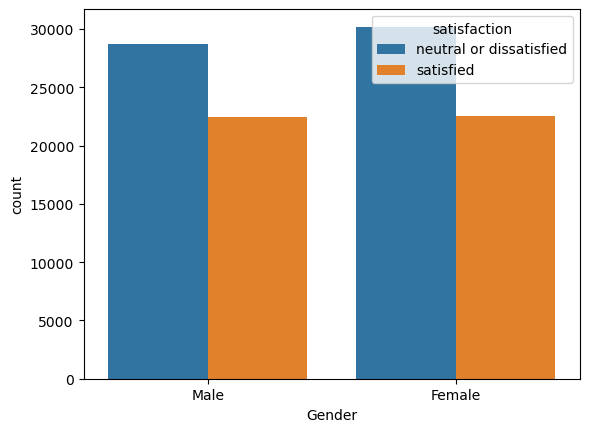

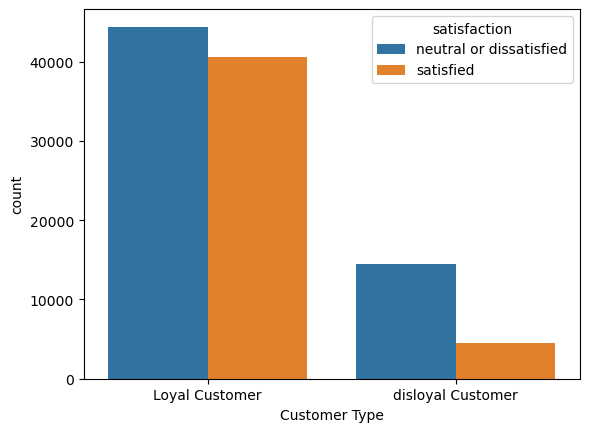

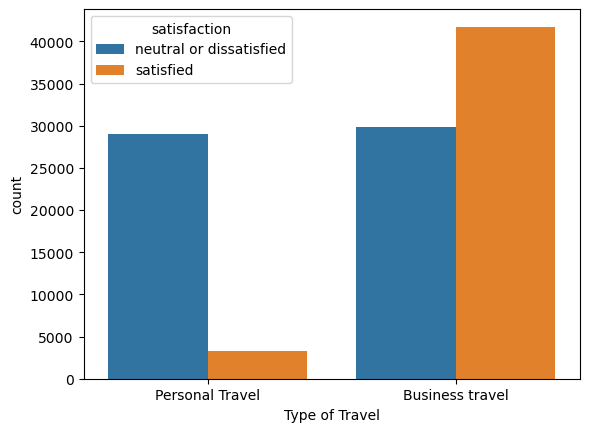

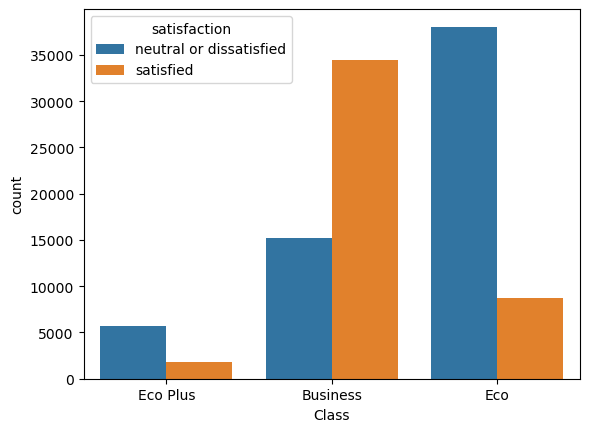

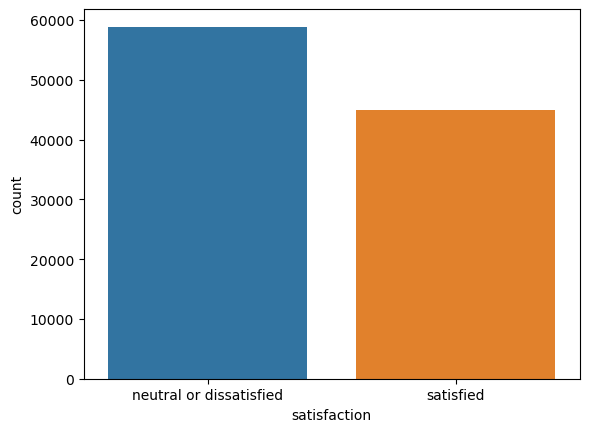

In [113]:
for col in df.columns:
    if df[col].dtype == 'object':
        sns.countplot(x=col, hue='satisfaction', data=df)
        plt.show()

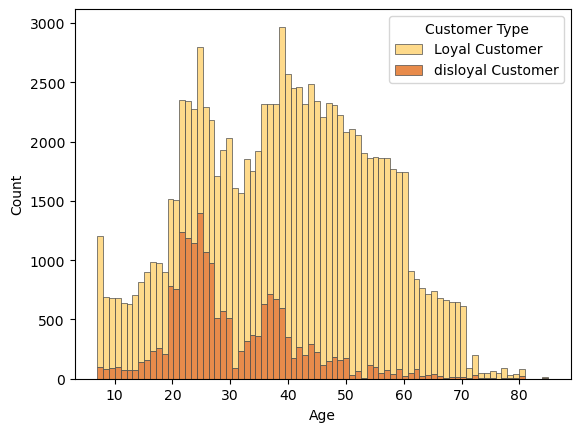

In [119]:
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5)
plt.show()

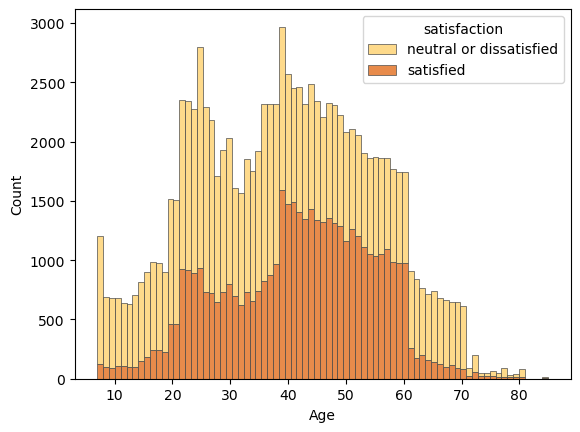

In [121]:
sns.histplot(df, x = "Age", hue = "satisfaction", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5)
plt.show()

In [84]:
df['satisfaction'] = df['satisfaction'].map({
    'neutral or dissatisfied': 0, 
    'satisfied': 1})

In [85]:
df.drop(columns=['id', 'Unnamed: 0'], inplace=True)
for i in df.columns:
    if df[i].isnull().any():
        if df[i].dtype == 'object':
            df[i].fillna(df[i].mode()[0], inplace=True)
        else:
            df[i].fillna(df[i].mean(), inplace=True)

/var/folders/2z/kf92m3b96t51tf0khtbqm3xh0000gn/T/ipykernel_15584/3798010498.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


In [86]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [87]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['number']).columns
for col in cat_cols:
    print(col, df[col].unique())
    

Gender ['Male' 'Female']
Customer Type ['Loyal Customer' 'disloyal Customer']
Type of Travel ['Personal Travel' 'Business travel']
Class ['Eco Plus' 'Business' 'Eco']


# Encoding

In [88]:
encoder = LabelEncoder()
for col in cat_cols:
    cardinality = df[col].nunique()
    if cardinality <= 4:
        # one-hot encoding
        dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
        # drop the original column and merge the dummy columns
        df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    else:
        # Apply label encoding
        df[col] = encoder.fit_transform(df[col])


# Scaling

In [89]:
scaler = StandardScaler()
cols = df.columns[df.columns != 'satisfaction']
df[cols] = scaler.fit_transform(df[cols])
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,...,0,-1.015031,1.015031,0.472767,-0.472767,-1.490614,1.490614,-0.956906,-0.904327,3.586776
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,...,0,-1.015031,1.015031,-2.115208,2.115208,0.670865,-0.670865,1.045034,-0.904327,-0.278802
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,...,1,0.985192,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,...,0,0.985192,-0.985192,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,...,1,-1.015031,1.015031,0.472767,-0.472767,0.670865,-0.670865,1.045034,-0.904327,-0.278802


# Model training

In [92]:
x = df.copy()
y = df['satisfaction']
x.drop(columns=['satisfaction'], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

# Model Selection - Decision Tree Classifier

In [93]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [94]:
y_pred = dt_model.predict(x_val)
cr_report = classification_report(y_val, y_pred)
print(classification_report(y_val, y_pred))
ac_score = accuracy_score(y_val, y_pred)
print('accuracy score: ', accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5862
           1       0.94      0.94      0.94      4529

    accuracy                           0.95     10391
   macro avg       0.95      0.95      0.95     10391
weighted avg       0.95      0.95      0.95     10391

accuracy score:  0.946588393802329


# Model Selection - Random Forest Classifier

In [95]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)


RandomForestClassifier()

In [96]:
y_pred = rf.predict(x_val)
cr_report1 = classification_report(y_val, y_pred)
print(cr_report1)
ac_score1 = accuracy_score(y_val, y_pred)
print('accuracy score: ', accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5862
           1       0.97      0.94      0.96      4529

    accuracy                           0.96     10391
   macro avg       0.97      0.96      0.96     10391
weighted avg       0.96      0.96      0.96     10391

accuracy score:  0.9644884996631701


In [97]:
data = [
  ["Decision Tree Classifier", ac_score],
  ["Random Forest Classifier", ac_score1]
]


headers = ['Model', 'accuracy score']

In [98]:
	
table = tabulate(data, headers, tablefmt='grid')
print(table)

+--------------------------+------------------+
| Model                    |   accuracy score |
+==========================+==================+
| Decision Tree Classifier |         0.946588 |
+--------------------------+------------------+
| Random Forest Classifier |         0.964488 |
+--------------------------+------------------+
